In [22]:
import tensorflow as tf


loaded_model6 = tf.keras.models.load_model("Model/saved_model6_withoutExp.keras")
loaded_model9 = tf.keras.models.load_model("Model/saved_model9_withoutExp.keras")



In [26]:
from DataLoader import get_data_loaders

train_data6, val_data6, test_data6, data_loader6 = get_data_loaders(
        cases=["exp"],
        doping=6.0,
        max_shots=1500,
        train_split=0.9,
        val_split = 0.01)

train_data9, val_data9, test_data9, data_loader9 = get_data_loaders(
    cases=["exp"],
    doping=9.0,
    max_shots=1200,
    train_split=0.9,
    val_split = 0.01)


exp
mean stagg mag taken:  12.648
mean stagg mag:  12.648
1500  snapshots
exp
mean stagg mag taken:  11.628333333333334
mean stagg mag:  11.628333333333334
1200  snapshots


In [27]:
data6=train_data6.concatenate(val_data6).concatenate(test_data6)
data9=train_data9.concatenate(val_data9).concatenate(test_data9)


In [28]:
import pandas as pd

x6 = loaded_model6.predict(data6)
df6 = pd.DataFrame(x6, columns=["AS", "pi"])

x9 = loaded_model9.predict(data9)
df9 = pd.DataFrame(x9, columns=["AS", "pi"])

labels6 = []
labels9 = []
classes = {0: "AS", 1: "pi"}
for _, label in data6:
    for l in label:
        labels6.append(classes[list(l).index(1)])

for _, label in data9:
    for l in label:
        labels9.append(classes[list(l).index(1)])

print(len(labels6), "|", len(labels9))


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-01-26 16:57:44.202159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1500 | 1200


2025-01-26 16:57:44.406686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
df6["pred"] = df6[["AS", "pi"]].idxmax(axis=1)
df9["pred"] = df9[["AS", "pi"]].idxmax(axis=1)
df9

,AS,pi,pred
0,1.659780e-05,9.999835e-01,pi
1,9.999201e-01,7.993709e-05,AS
2,9.975686e-01,2.431419e-03,AS
3,9.973135e-01,2.686544e-03,AS
4,8.072234e-01,1.927765e-01,AS
...,...,...,...
1195,9.966355e-01,3.364542e-03,AS
1196,4.172291e-01,5.827709e-01,pi
1197,3.382124e-05,9.999662e-01,pi
1198,1.954012e-07,9.999998e-01,pi


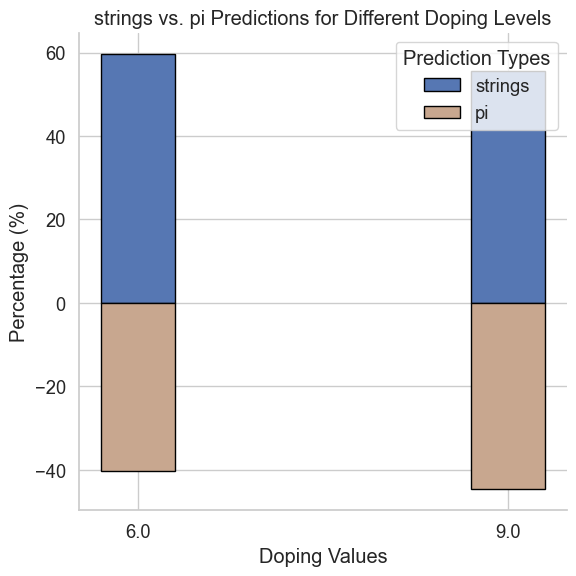

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the two datasets and calculate percentages
df_combined = {
    "Doping": ["6.0", "9.0"],
    "AS": [len(df6[df6["pred"] == "AS"]) / len(df6) * 100, len(df9[df9["pred"] == "AS"]) / len(df9) * 100],
    "pi": [len(df6[df6["pred"] == "pi"]) / len(df6) * 100, len(df9[df9["pred"] == "pi"]) / len(df9) * 100]
}
df_combined = pd.DataFrame(df_combined)

# Define custom colors and bar width
colors = ['#5677b3', '#c8a78f']  # AS (blue), pi (tan)
bar_width = 0.2

# Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 6))
x = range(len(df_combined))  # X positions for each doping value

# Plot AS and pi bars
ax.bar(x, df_combined["AS"], width=bar_width, color=colors[0], label="strings", edgecolor="black")
ax.bar(x, -df_combined["pi"], width=bar_width, color=colors[1], label="pi", edgecolor="black")

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(df_combined["Doping"])
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Doping Values")
ax.set_title("strings vs. pi Predictions for Different Doping Levels")
ax.legend(title="Prediction Types", loc="upper right")

# Add grid and improve aesthetics
sns.despine()
plt.tight_layout()
plt.show()

In [39]:
df_combined

,Doping,AS,pi
0,6.0,59.6,40.4
1,9.0,55.5,44.5
